In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

import seawater as gsw

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
salt = plotvar[0,200:300,0]

In [3]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.TEMP.nc')
plotvar = data.variables['TEMP'][0,:,:]
temp = plotvar[0,200:300,0]

In [33]:
T = np.arange(-2,4,0.1)
S = np.arange(33.5,34.5,0.05)
dens = np.zeros([60,20])

In [34]:
# Loop to fill in grid with densities
for j in range(0,60):
    for i in range(0, 20):
        dens[j,i]=gsw.dens0(S[i],T[j])-1000

In [35]:
T

array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        1.77635684e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00,
        2.00000000e+00,  2.10000000e+00,  2.20000000e+00,  2.30000000e+00,
        2.40000000e+00,  2.50000000e+00,  2.60000000e+00,  2.70000000e+00,
        2.80000000e+00,  2.90000000e+00,  3.00000000e+00,  3.10000000e+00,
        3.20000000e+00,  

Text(0, 0.5, 'Temperature (C)')

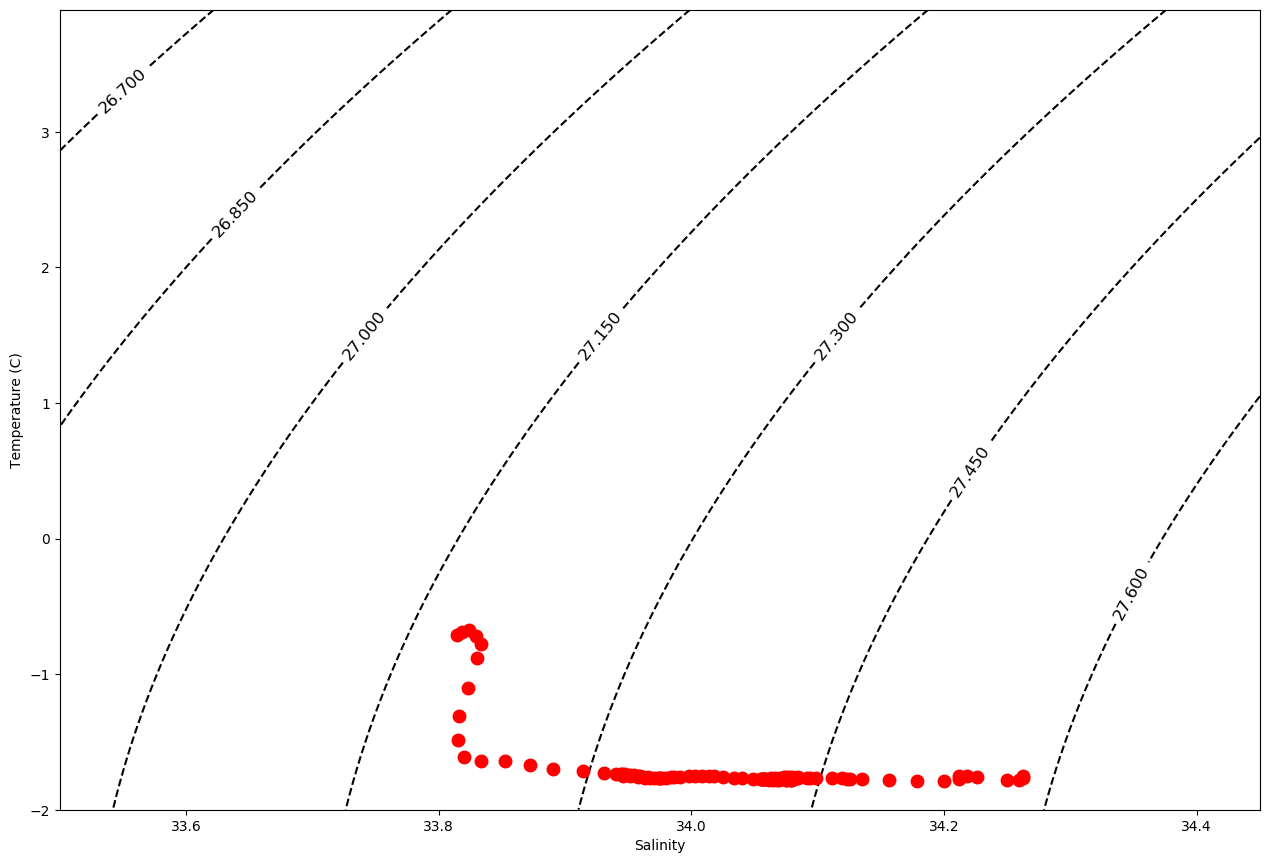

In [37]:
# Plot data ***********************************************
fig = plt.figure(figsize=(15, 10), dpi=100)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
CS = plt.contour(S,T,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.3f') # Label every second level
 
ax1.plot(salt,temp,'or',markersize=9)
 
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature (C)')